<a href="https://colab.research.google.com/github/geninhabarros/geninhabarros/blob/main/Mod2(EP_wip).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0. Libraries**

In [ ]:
#PANDAS (create, manipulate and visualize data table; import dataset and manipulate data)
import pandas as pd

#NUMPY (numerical calculation, create arrays)
import numpy as np

#MATPLOTLIB (generating and visualising graphs,plotting graphs)
import matplotlib.pyplot as plt

#SEABORN (plot graphs)
import seaborn as sns

#IMBLEARN (balancear dados)
from imblearn.over_sampling import RandomOverSampler, SMOTE

#SCI-KIT LEARN (classifiers and metrics)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_score

#PLOTLY (interactive graphs)
import plotly.graph_objs as go
import plotly.express as px

**1. Exploratory analysis of the variables**

In [ ]:
#Import dataframe
from google.colab import drive

#Mount Google Drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/datasets/dataset_mod2.csv"
dataframe = pd.read_csv(file_path)

#Print dataframe
dataframe

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Conversion,Age,Gender,Education,HTA,DLP,Smoker,Antidepressants,MMSE,GDS
0,1,1,73,1,2,1,1,1,0,29,5
1,2,0,74,1,2,1,1,0,0,25,21
2,3,0,77,0,3,1,0,0,0,27,13
3,4,0,53,0,3,1,1,0,0,30,5
4,5,0,60,0,2,0,1,2,0,29,14
...,...,...,...,...,...,...,...,...,...,...,...
94,95,0,62,0,1,1,0,2,0,29,13
95,96,0,63,0,3,0,0,0,1,29,8
96,97,0,47,0,1,1,1,0,0,29,20
97,98,0,49,1,3,0,0,0,1,26,5


In [ ]:
#Eliminate ID column (without relevant information)
dataframe = dataframe.drop('ID', axis=1)

#Show new dataframe without ID column
dataframe

,Conversion,Age,Gender,Education,HTA,DLP,Smoker,Antidepressants,MMSE,GDS
0,1,73,1,2,1,1,1,0,29,5
1,0,74,1,2,1,1,0,0,25,21
2,0,77,0,3,1,0,0,0,27,13
3,0,53,0,3,1,1,0,0,30,5
4,0,60,0,2,0,1,2,0,29,14
...,...,...,...,...,...,...,...,...,...,...
94,0,62,0,1,1,0,2,0,29,13
95,0,63,0,3,0,0,0,1,29,8
96,0,47,0,1,1,1,0,0,29,20
97,0,49,1,3,0,0,0,1,26,5


In [ ]:
#Verify null values
dataframe.isnull().sum()

,0
Conversion,0
Age,0
Gender,0
Education,0
HTA,0
DLP,0
Smoker,0
Antidepressants,0
MMSE,0
GDS,0


In [ ]:
#Separate dataset in X (independent variable) and Y (dependent variable)
X = dataframe.iloc[:, 1:10]
Y = dataframe['Conversion']

In [ ]:
#Show X
X

,Age,Gender,Education,HTA,DLP,Smoker,Antidepressants,MMSE,GDS
0,73,1,2,1,1,1,0,29,5
1,74,1,2,1,1,0,0,25,21
2,77,0,3,1,0,0,0,27,13
3,53,0,3,1,1,0,0,30,5
4,60,0,2,0,1,2,0,29,14
...,...,...,...,...,...,...,...,...,...
94,62,0,1,1,0,2,0,29,13
95,63,0,3,0,0,0,1,29,8
96,47,0,1,1,1,0,0,29,20
97,49,1,3,0,0,0,1,26,5


In [ ]:
#Show Y
Y

,Conversion
0,1
1,0
2,0
3,0
4,0
...,...
94,0
95,0
96,0
97,0


**2. Balancing the data**

In [ ]:
#Print total number of each class (to see if data is balanced)
Y.value_counts()

,count
Conversion,
0,67
1,32


In [ ]:
#Balancing the data (it turns out that there is an undersample of 1 values, so we are going to artificially increase this number)
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

Y_resampled.value_counts()

,count
Conversion,
1,67
0,67


In [ ]:
X_resampled

,Age,Gender,Education,HTA,DLP,Smoker,Antidepressants,MMSE,GDS
0,73,1,2,1,1,1,0,29,5
1,74,1,2,1,1,0,0,25,21
2,77,0,3,1,0,0,0,27,13
3,53,0,3,1,1,0,0,30,5
4,60,0,2,0,1,2,0,29,14
...,...,...,...,...,...,...,...,...,...
129,77,0,3,0,1,0,1,30,5
130,73,1,2,1,1,1,0,29,5
131,65,0,3,0,0,0,0,30,8
132,63,0,4,1,1,0,1,29,5


**3. Creating the model**

In [ ]:
#Separate the date into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#Iniciate the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model
rf_model.fit(X_train, Y_train)

#Making predictions
Y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"A Accuracy é {accuracy:.2f}")

A Accuracy é 0.73


**4. Defining the optimal hyperparametres**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=5, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.7333333333333333

**5. Most important variables**

In [ ]:
importances = rf_model.feature_importances_
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importances_df = importances_df.sort_values('Importance', ascending=False)
importances_df

,Feature,Importance
0,Age,0.282101
8,GDS,0.244874
2,Education,0.126528
7,MMSE,0.100446
6,Antidepressants,0.098176
4,DLP,0.043296
5,Smoker,0.040188
1,Gender,0.037582
3,HTA,0.026809


**6. Confusion Matrix**

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[19,  6],
       [ 2,  3]])

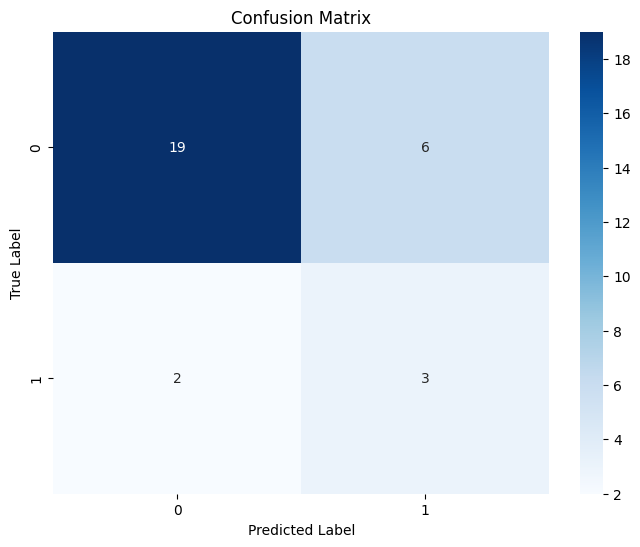

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**7. ROC Curve**

In [ ]:
Y_score = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
roc_auc = auc(fpr, tpr)

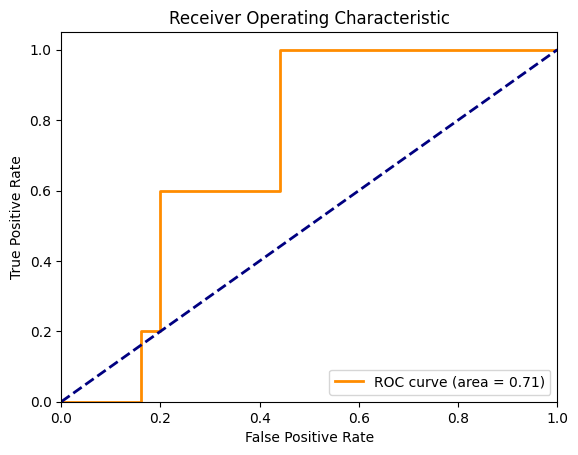

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

**8. Interactive summary**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.imshow(cm, text_auto=True, color_continuous_scale='Viridis')
fig.update_layout(title="Confusion Matrix", xaxis_title="Predicted", yaxis_title="Actual")
fig.show()

In [ ]:
fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve (area = %0.2f)' % roc_auc))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))
fig_roc.update_layout(title='Receiver Operating Characteristic (ROC) Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig_roc.show()

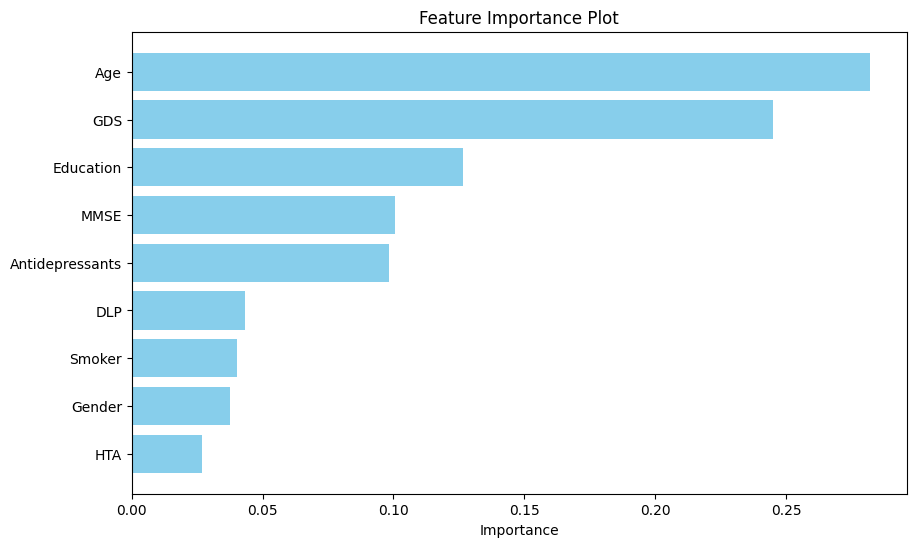

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

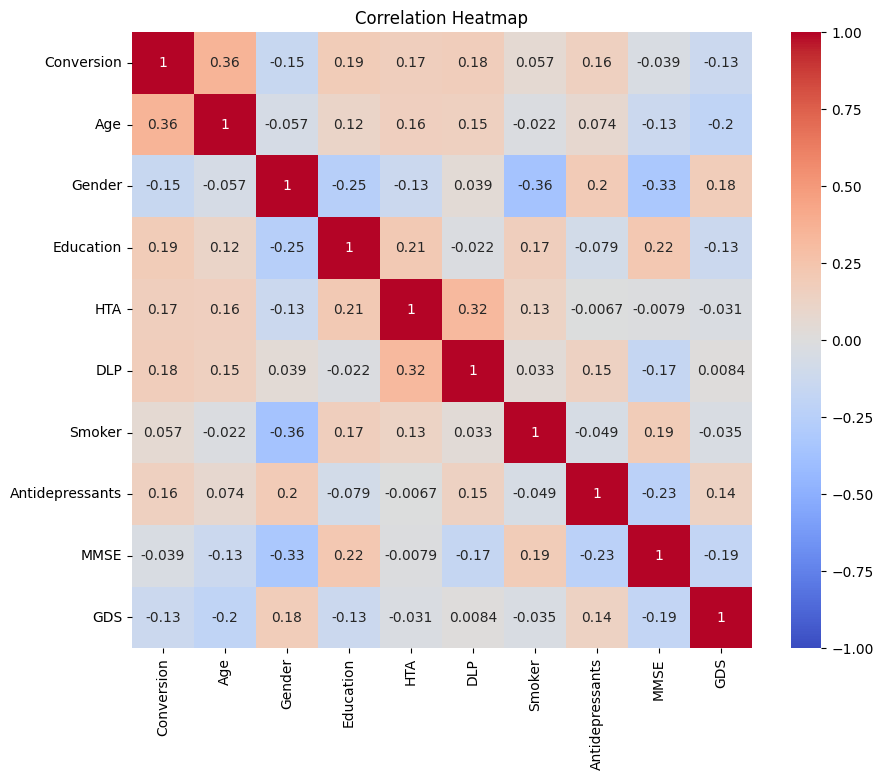

In [ ]:
corr_matrix = dataframe.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
n_estimators_range = [100, 200, 300]
max_depth_range = [None, 10, 20, 30]

results = []

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=5, random_state=42)
        accuracy = cross_val_score(rf, X_train, Y_train, cv=5, scoring='accuracy').mean()
        results.append({'n_estimators': n_estimators, 'max_depth': max_depth, 'accuracy': accuracy})

results_df = pd.DataFrame(results)



fig = px.scatter_3d(results_df,
                    x='n_estimators',
                    y='max_depth',
                    z='accuracy',
                    color='accuracy',
                    color_continuous_scale='Viridis',
                    title='Hyperparameter Tuning: Random Forest',
                    labels={'n_estimators': 'Number of Estimators', 'max_depth': 'Max Depth', 'accuracy': 'Accuracy'})

fig.update_layout(scene=dict(
                    xaxis=dict(title='Number of Estimators'),
                    yaxis=dict(title='Max Depth'),
                    zaxis=dict(title='Accuracy')),
                  margin=dict(l=0, r=0, b=0, t=0))

fig.show()